# SCC-ICMC-USP - 2o. semestre de 2021
# SCC0275. 

### Profa. Roseli A. F. Romero

### Monitor: Kenzo Sakiyama

Nro do grupo: Não sei mesmo

Alunos:


1.   Éverton Luís Mendes da Silva, 10728171



## Dados multidimensionais

#### 1. Importe as bibliotecas Numpy e Pandas e carregue o conjunto de dados Iris



In [1]:
# Imports
import pandas as pd
import copy
import numpy as np

In [2]:
# Carregando base de dados
df = pd.read_csv("iris.data")

### [Sobre o Iris ](https://pt.wikipedia.org/wiki/Conjunto_de_dados_flor_Iris)
O conjunto de dados consiste em amostras de três espécies de flores Iris ( Iris setosa, Iris virginica e Iris versicolor). Quatro atributos foram medidos em cada amostra: o comprimento e a largura das sépalas e pétalas, em centímetros.

A estrutura das variáveis no arquivo é:

1. comprimento sépala em cm
2. largura sépala em cm
3. comprimento da pétala em cm
4. largura da pétala em cm
5. classe:
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica

#### 2. Coloque nomes nas colunas do DataFrame de acordo com a descrição acima

In [3]:
#pd.read_csv(data, names=column_names)

def add_column_names(df):
  # seu código aqui

  df_copy=copy.deepcopy(df)
  features=['sepal_length (cm)', 'sepal_width (cm)', 'petal_length (cm)', 'petal_width (cm)', 'type_of_iris']

  first_sample=copy.deepcopy(df_copy.columns)
  row_df_copy=pd.DataFrame([first_sample], columns=features)

  df_copy.columns=features
  df_copy=pd.concat([row_df_copy, df_copy], ignore_index=True)
  
  return df_copy

In [4]:
df=add_column_names(df)
df.head()

,sepal_length (cm),sepal_width (cm),petal_length (cm),petal_width (cm),type_of_iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5,3.6,1.4,0.2,Iris-setosa


#### 3. Usando Pandas, gere um histograma dos valores para cada um dos atributos (colunas)



In [5]:
def show_histograms(df):
  # seu código aqui
  df.drop(columns='type_of_iris').astype(float).hist()

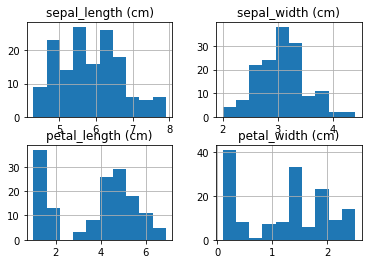

In [6]:
show_histograms(df)

#### 4. Mostre o histograma para cada classe de um atributo (recebido por parâmetro)

Você deverá filtrar exemplos da classe desejada antes de fazer o plot dos histogramas.

---





In [7]:
def show_histogram_per_class(df, attr_name):
  
  df.drop(columns='type_of_iris').astype(float).hist(attr_name)

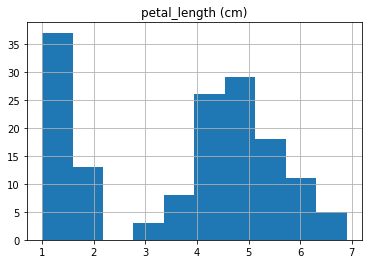

In [8]:
show_histogram_per_class(df, 'petal_length (cm)')

#### 5. Todas as medições foram feitas em cm, crie uma nova coluna para cada atributo com seus valores em milímetros

In [9]:
def add_mm_cols(df):

  df_copy=copy.deepcopy(df)
  
  def convert_cm_mm(value):
    return value*10

  df_features=copy.deepcopy(df_copy.drop(columns='type_of_iris').astype(float))
  df_convert=df_features.applymap(np.vectorize(convert_cm_mm))

  #creating a list with the new names for the columns, replacing cm to mm
  new_columns=copy.deepcopy(df_convert.columns.values)
  new_columns=[name_column.replace('(cm)', '(mm)') for name_column in new_columns]
  df_convert.columns=new_columns
  
  df_with_mm=pd.concat([df_copy.drop(columns='type_of_iris').astype(float), df_convert],  axis=1)
  df_with_mm=pd.concat([df_with_mm, df_copy['type_of_iris']], axis=1)
  df_with_mm=copy.deepcopy(df_with_mm)

  return df_with_mm

In [10]:
df=add_mm_cols(df)
df.head()

,sepal_length (cm),sepal_width (cm),petal_length (cm),petal_width (cm),sepal_length (mm),sepal_width (mm),petal_length (mm),petal_width (mm),type_of_iris
0,5.1,3.5,1.4,0.2,51.0,35.0,14.0,2.0,Iris-setosa
1,4.9,3.0,1.4,0.2,49.0,30.0,14.0,2.0,Iris-setosa
2,4.7,3.2,1.3,0.2,47.0,32.0,13.0,2.0,Iris-setosa
3,4.6,3.1,1.5,0.2,46.0,31.0,15.0,2.0,Iris-setosa
4,5.0,3.6,1.4,0.2,50.0,36.0,14.0,2.0,Iris-setosa


### 6.  Conte o número de amostras por classe, retorne uma lista com 3 elementos com a contagem de cada classe


In [11]:
def count_samples_per_class(df):

  return list(df['type_of_iris'].value_counts().values)

In [12]:
count_samples_per_class(df)

[50, 50, 50]

#### 7. Dado um atributo, printe qual classe possui o maior e menor valor. Exemplo (não necessáriamente correto): "A classe Iris-Setosa possui a menor medição de largura de sépala."

In [13]:
def min_max(df, attr_name):
  
  min_class_name=df.iloc[df[attr_name].argmin()]['type_of_iris']
  max_class_name=df.iloc[df[attr_name].argmax()]['type_of_iris']

  print('A classe {} possui o menor {}'.format(min_class_name, attr_name))
  print('A classe {} possui o maior {}'.format(max_class_name, attr_name))

In [14]:
min_max(df, 'petal_length (cm)')

A classe Iris-setosa possui o menor petal_length (cm)
A classe Iris-virginica possui o maior petal_length (cm)
